In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import re

In [2]:
%run ../../../Util/FileFolder
%run ../../../Util/Variable
%run ../../../Util/ImageProcessing

created


#### Training

In [3]:
analaysis_Path=os.path.join(ayush_classFication_Working_ready,'train')
anaysis_summary_Path=os.path.join(ayush_classification_prepare_summary,'training')

In [4]:
f'{count_files_in_folder(analaysis_Path)} images in The Dataset' # from File Handle

'41961 images in The Dataset'

In [5]:
volume=folder_size_in_gb(analaysis_Path) # from File Handle
f'Dataset have  {volume} GB Data'

'Dataset have  0.3955270880833268 GB Data'

In [6]:
create_new_folders(anaysis_summary_Path)

'already exsist'

In [7]:
reportjsonfile=os.path.join(anaysis_summary_Path,'report_train_jsonfile.json')

In [8]:
with open(reportjsonfile, 'w', encoding='utf-8') as json_file:
    json.dump({
        'volume_gb':volume,
        'count':count_files_in_folder(analaysis_Path)
        }, json_file, indent=2)

In [9]:
subfolder={}
subfolderCount=num_sub_folders(analaysis_Path)
subfolder['count']=subfolderCount

In [10]:
folders_names=sub_folders(analaysis_Path)

In [11]:
folders=list(
    map(
        lambda name: 
            {'name':name,
             'path':os.path.join(analaysis_Path,name),
             'filecount':count_files_in_folder(os.path.join(analaysis_Path,name)),
             'volume':{
                 'GB':folder_size_in_gb(os.path.join(analaysis_Path,name)),
                 "KB":folder_size_in_kb(os.path.join(analaysis_Path,name)),
                "MB":folder_size_in_mb(os.path.join(analaysis_Path,name))
             }
            },folders_names))
folder_li=list(map( lambda name: 
            [name,
             folder_size_in_gb(os.path.join(analaysis_Path,name)),
            folder_size_in_kb(os.path.join(analaysis_Path,name)),
            folder_size_in_mb(os.path.join(analaysis_Path,name))
             
            ],folders_names))
folder_count_li=list(map( lambda name: 
            [name,
            count_files_in_folder(os.path.join(analaysis_Path,name)),
             
            ],folders_names))

In [12]:
save_to_csv_filedetails(data=folder_li,colums=['Names','VolumeKB','VolumeMB',"VolumeGB"],csv_filename='train_volumereportcsv.csv',save_folder=anaysis_summary_Path)
save_to_csv_filedetails(data=folder_count_li,colums=['Names','counts'],csv_filename='train_countreportcsv.csv',save_folder=anaysis_summary_Path)

32

In [13]:
subfolderpaths=subfolders_path(analaysis_Path)

In [14]:
subfolders=[]
for subfolder in folders:
     subfoldernames=sub_folders(subfolder['path'])
     subchild=list(
        map(lambda name: {
                'name':name,
                'path':os.path.join(subfolder['path'],name),
                 'filecount':count_files_in_folder(os.path.join(subfolder['path'],name)),
                 'volume':{
                     'GB':folder_size_in_gb(os.path.join(subfolder['path'],name)),
                     "KB":folder_size_in_kb(os.path.join(subfolder['path'],name)),
                    "MB":folder_size_in_mb(os.path.join(subfolder['path'],name)),
                 },
                },subfoldernames)),
     subfolder['subfolders']=subchild,
     subfolders.append(subfolder)

In [15]:
subfolders=[]
for subfolder in folders:
     subfoldernames=sub_folders(subfolder['path'])
     subchild=list(
        map(lambda name: {
                'name':name,
                'path':os.path.join(subfolder['path'],name),
                 'filecount':count_files_in_folder(os.path.join(subfolder['path'],name)),
                 'volume':{
                     'GB':folder_size_in_gb(os.path.join(subfolder['path'],name)),
                     "KB":folder_size_in_kb(os.path.join(subfolder['path'],name)),
                    "MB":folder_size_in_mb(os.path.join(subfolder['path'],name)),
                 },
                },subfoldernames)),
     subfolder['subfolders']=subchild,
     subfolders.append(subfolder)

In [16]:
def subpartcountmaping(subpart):
    subpartRow=[]
    subpartRow.append(subpart['speciesname'])
    subpartRow.append(subpart['path'])
    for part in ['leaves','plants','flowers','raw_fruits','root']:
        subpartRow.append(subpart[part]) if part in subpart.keys() else subpartRow.append(0)
    return subpartRow

In [17]:
leafpattern = re.compile(r'^(leaf|leafs|leaves|Leaves|Leaf)$')
plantpattern=re.compile(r'^(Plants|plant|plants|p|Plant)$')
rawFruitpattern=re.compile(r'^(fruits|Fruit|kaai|Fruits|fruit|raw_fruits|seeds|kai)$')
flowerpattern=re.compile(r'^(Flower|flower|flowers)$')
Rootpattern=re.compile(r'^(kilanku|Root|root)$')
subsub=[]
for i,subpath in enumerate(subfolderpaths):
    subsubnames=sub_folders(subpath)
    subsubpath=subfolders_path(subpath)
    sub={
        'speciesname':folders_names[i],
    }
    for ind,s in enumerate(subsubnames):
        sub['path']=subsubpath[ind]
        if leafpattern.match(s):
            sub['leaves']=count_files_in_folder(subsubpath[ind])
        elif plantpattern.match(s):
            sub['plants']=count_files_in_folder(subsubpath[ind])
        elif flowerpattern.match(s):
            sub['flowers']=count_files_in_folder(subsubpath[ind])
        elif rawFruitpattern.match(s):
            sub['raw_fruits']=count_files_in_folder(subsubpath[ind])
        elif Rootpattern.match(s):
            sub['root']=count_files_in_folder(subsubpath[ind])
        else:
             sub[s]=count_files_in_folder(subsubpath[ind])
    subsub.append(sub)

In [18]:
subsubli=list(map(lambda tr:subpartcountmaping(tr),subsub))

In [19]:
with open(reportjsonfile, 'r+') as f:
        # Load existing data from JSON
        existing_data = json.load(f)
        
        # Append new data to existing JSON data
        existing_data['subfolder']=subfolders
        
        # Write updated data back to JSON file
        f.seek(0)
        json.dump(existing_data, f, indent=4)
        f.truncate()

In [20]:
subfolderdetails =list(map(lambda folder: {
    'name':folder['name'],
    'path':folder['path'],
    'files':folder['filecount'],
    'volume(MB)':folder['volume']['MB'],
    },subfolders)) 
subfolderdetails_li=list(map(lambda folder: [
    folder['name'],
    folder['path'],
    folder['filecount'],
    folder['volume']['MB'],
    len(folder['subfolders'])
    ],subfolders)) 

In [21]:
save_to_csv_filedetails(data=subsubli,colums=["Speciesname","Path","Leaves","Plants","Flowers","rawFruits","Root"],csv_filename='subpart_train__reportcsv.csv',save_folder=anaysis_summary_Path)
save_to_csv_filedetails(data=subfolderdetails_li,colums=["Names","Path","Files","Volume MB","subfolders"],csv_filename='report_train_csv.csv',save_folder=anaysis_summary_Path)

32

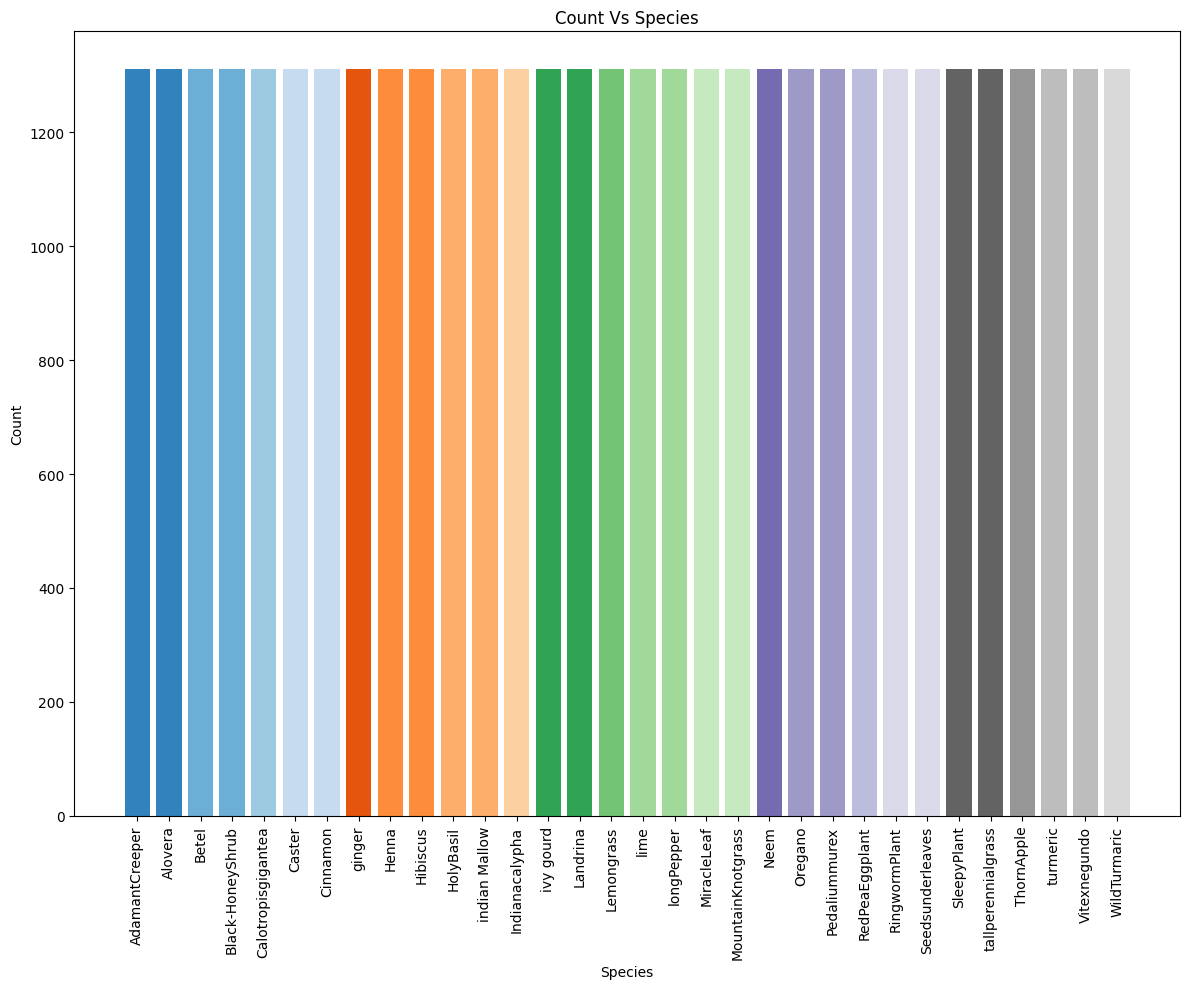

In [22]:
subfolderCounCsvsubpartdataFrame=pd.read_csv(os.path.join(anaysis_summary_Path,'report_train_csv.csv'))
plt.figure(figsize=(12, 10))  # Set the figure size (width, height) in inches
colors = [plt.cm.tab20c(i/len(subfolderCounCsvsubpartdataFrame['Names'])) for i in range(len(subfolderCounCsvsubpartdataFrame['Names']))]
# Plot bars
plt.bar(subfolderCounCsvsubpartdataFrame['Names'], subfolderCounCsvsubpartdataFrame['Files'], color=colors)

# Customize chart
plt.xlabel('Species')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Count Vs Species')  # Chart title
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed

# Show plot
plt.tight_layout()  # Adjust layout for better appearance of labels
plt.savefig(os.path.join(anaysis_summary_Path,'SpeciestrainCount.png'))
plt.show()

In [23]:
subpartdataFrame=pd.read_csv(os.path.join(anaysis_summary_Path,'subpart_train__reportcsv.csv'))

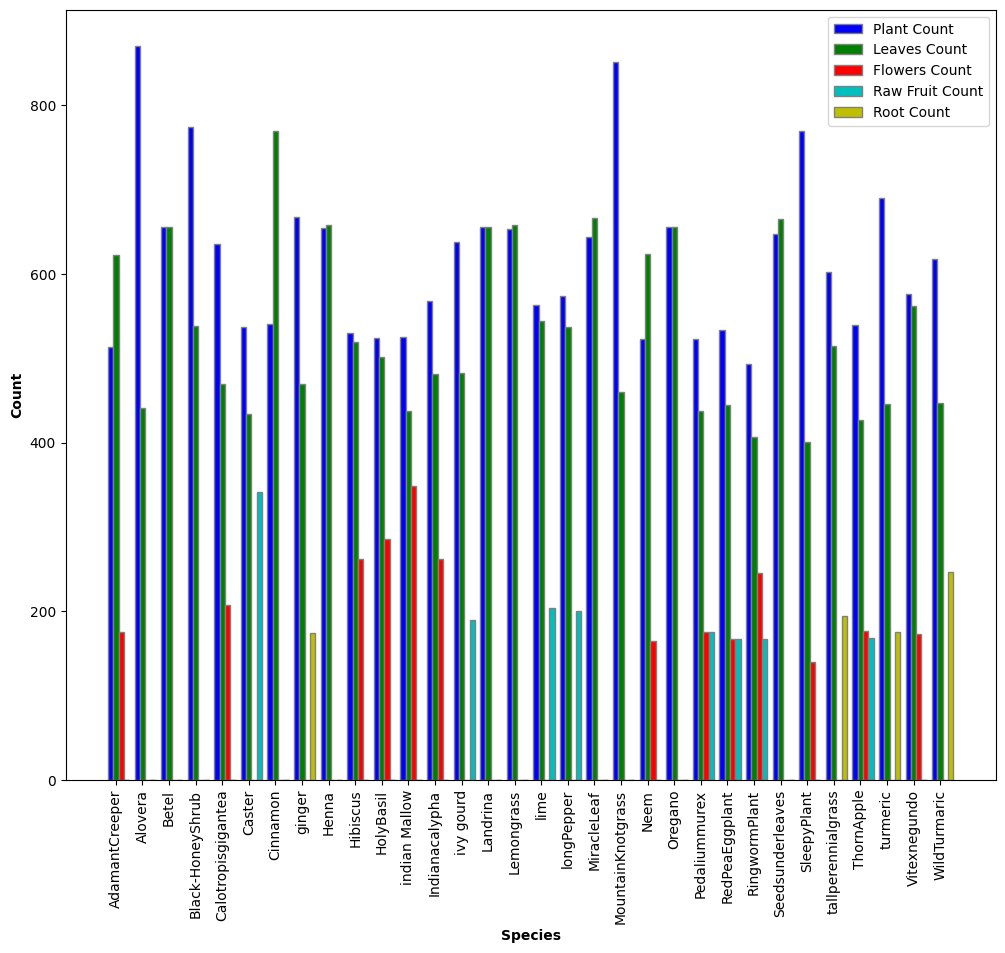

In [24]:

plt.figure(figsize=(12, 10))

# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = range(len(subpartdataFrame['Speciesname']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]


# Create the bars
plt.bar(r1, subpartdataFrame['Plants'], color='b', width=bar_width, edgecolor='grey', label='Plant Count')
plt.bar(r2, subpartdataFrame['Leaves'], color='g', width=bar_width, edgecolor='grey', label='Leaves Count')
plt.bar(r3, subpartdataFrame['Flowers'], color='r', width=bar_width, edgecolor='grey', label='Flowers Count')
plt.bar(r4, subpartdataFrame['rawFruits'], color='c', width=bar_width, edgecolor='grey', label='Raw Fruit Count')
plt.bar(r4, subpartdataFrame['Root'], color='y', width=bar_width, edgecolor='grey', label='Root Count')

# Add xticks on the middle of the group bars
plt.xlabel('Species', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(subpartdataFrame['Speciesname']))], subpartdataFrame['Speciesname'])

# Add y-axis label
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=90) 
# Add a legend
plt.legend()
plt.savefig(os.path.join(anaysis_summary_Path,'SpeciesSub_train_Parte.png'))
# Show the plot
plt.show()

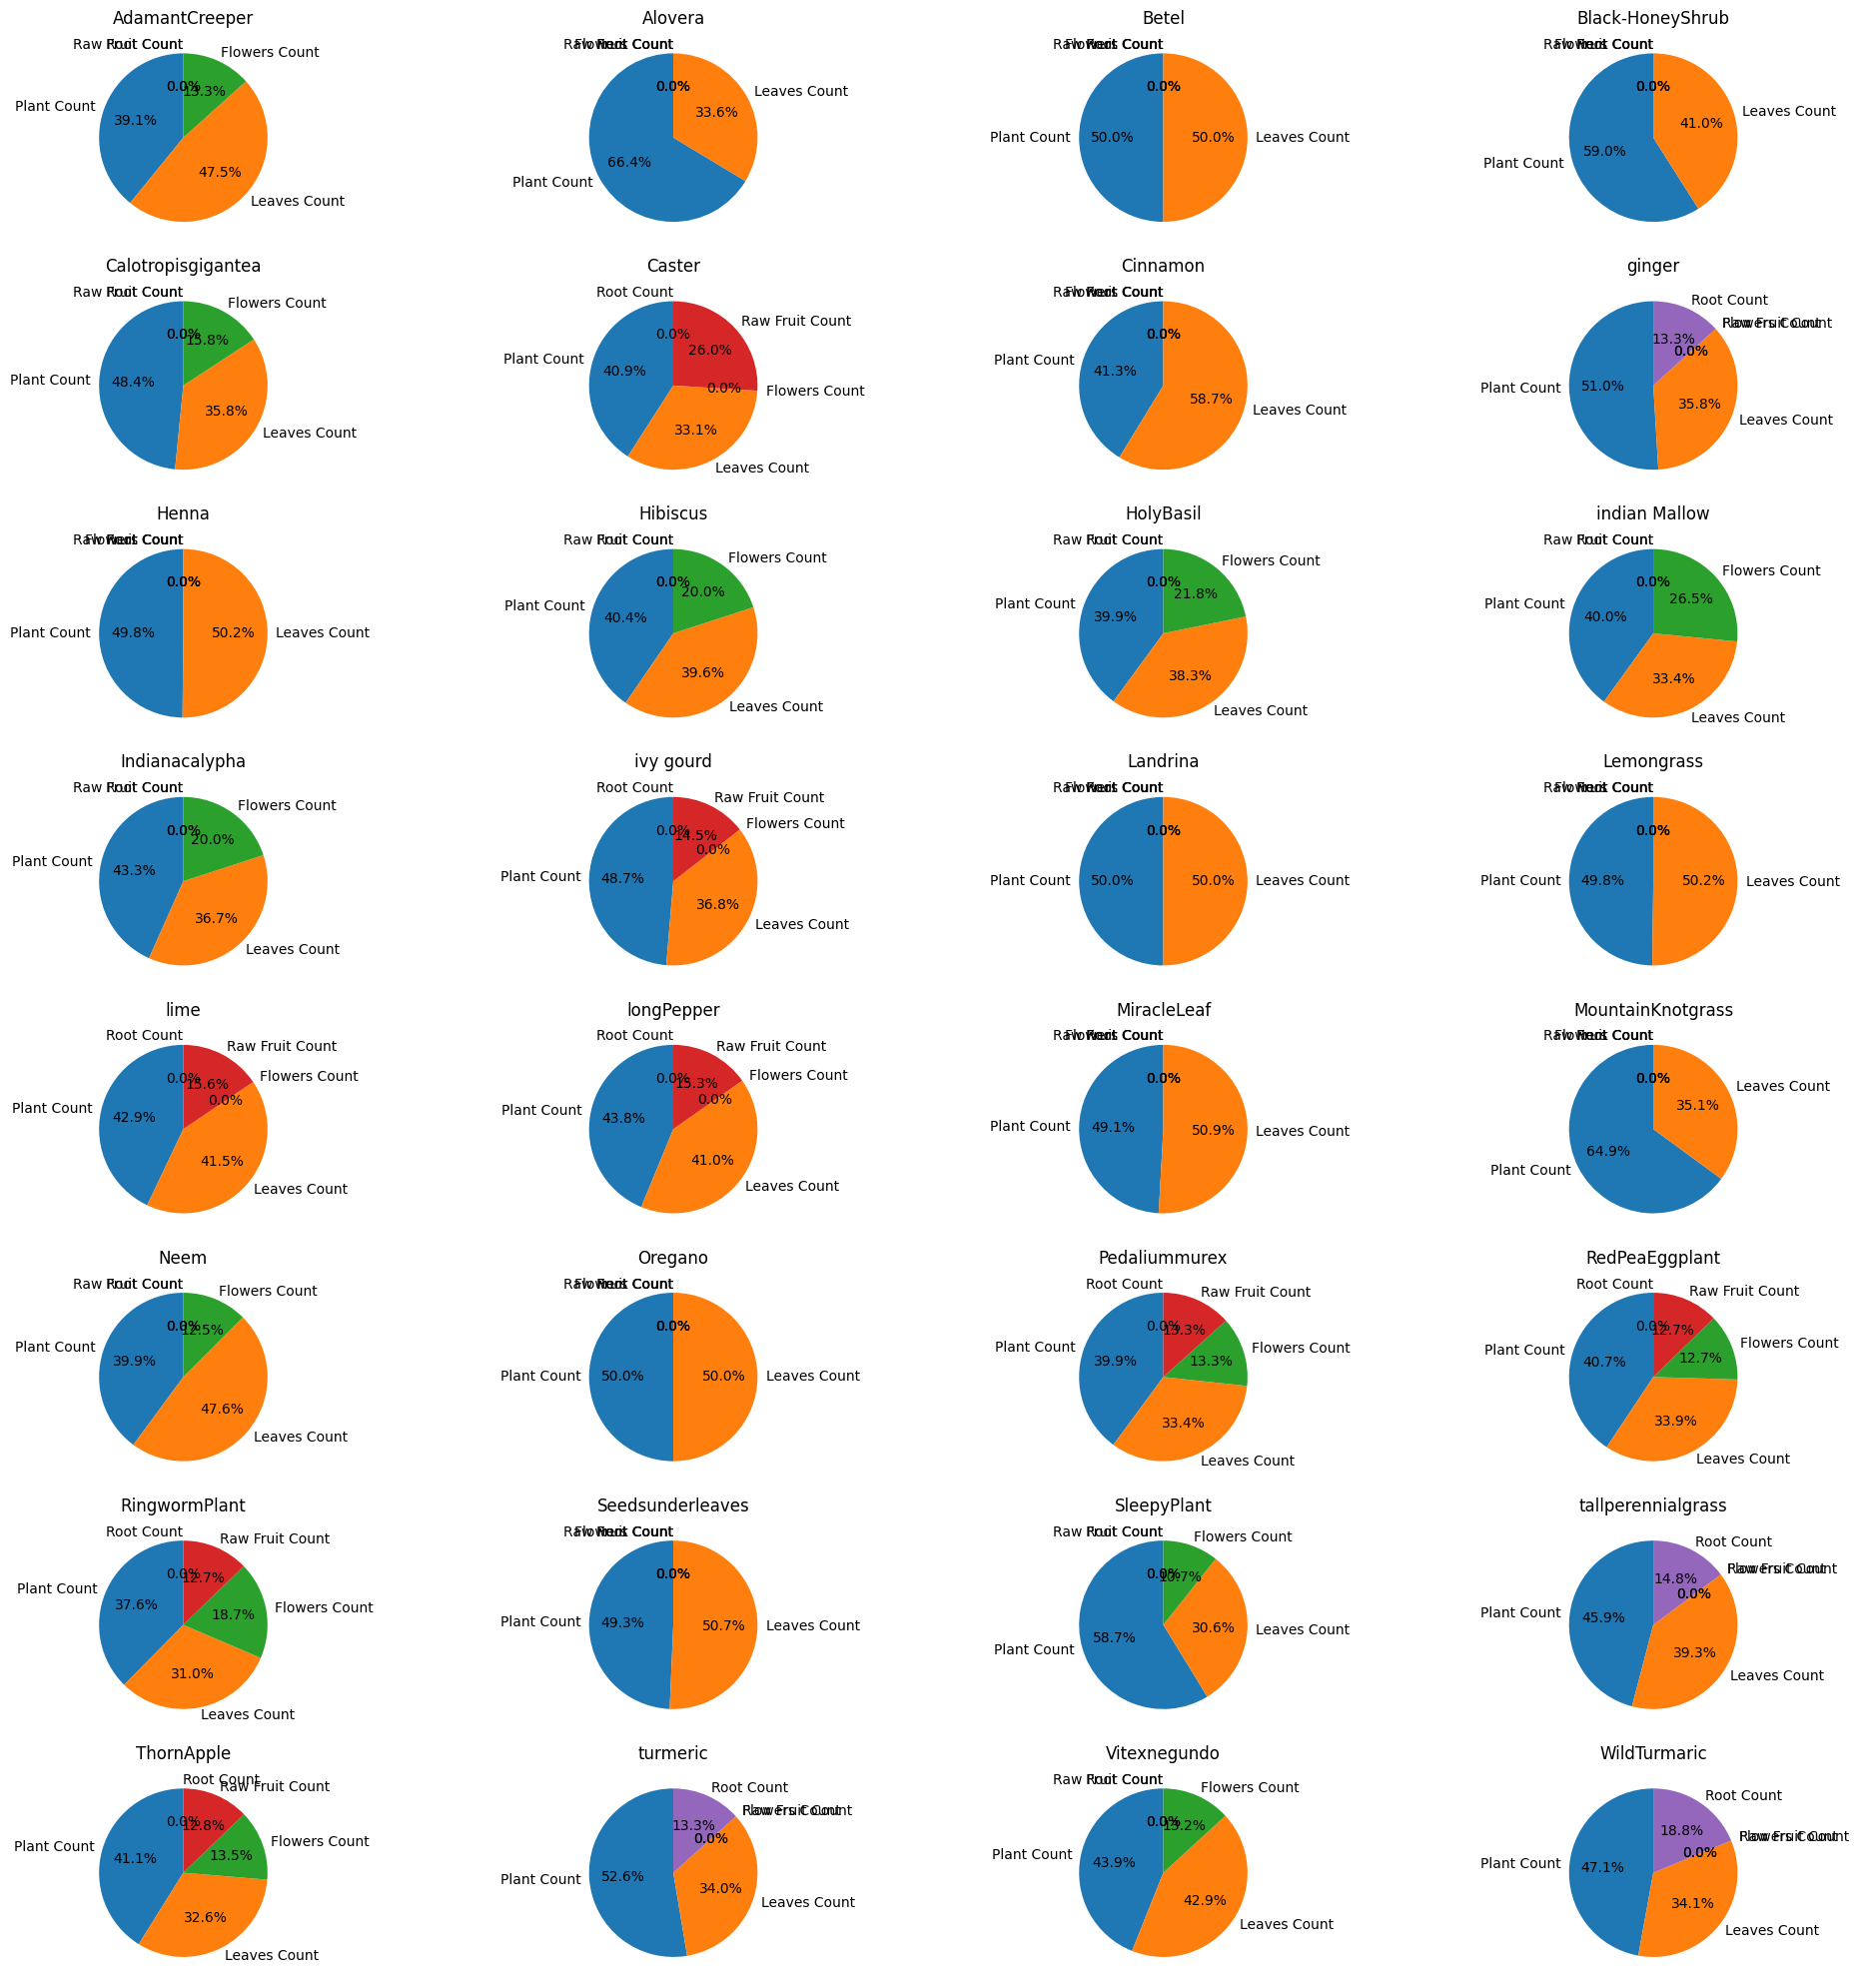

In [25]:
# Number of species
num_species = len(subpartdataFrame)

# Calculate the number of rows and columns for the subplots
num_cols = 4
num_rows = (num_species + num_cols - 1) // num_cols

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each pie chart
for i, ax in enumerate(axes):
    if i < num_species:
        species_data = subpartdataFrame.iloc[i]
        ax.pie(
            [species_data['Plants'], species_data['Leaves'], species_data['Flowers'],species_data['rawFruits'],species_data['Root']],
            labels=['Plant Count', 'Leaves Count', 'Flowers Count', "Raw Fruit Count",'Root Count'],
            autopct='%1.1f%%',
            startangle=90
        )
        ax.set_title(species_data['Speciesname'])
    else:
        ax.axis('off')  # Turn off unused subplots

# Adjust layout
plt.tight_layout()
plt.savefig(os.path.join(anaysis_summary_Path,'SpeciesSubPart_train_Pie.png'))
plt.show()
